# Week 8 - Regression

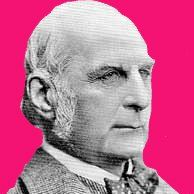

Galton이 부모의 키와 아이들의 키의 관계를 연구하던 중, 부모의 키와 아이들의 키에는 선형 관계가 존재하고 전체 평균 키로 돌아가려는 특징이 있음을 발견하였다. 이를 '회귀분석'이라고 하였다.

<b> 회귀계수의 선형 여부에 따라 </b>
- 선형 회귀(linear regression)
- 비선형 회귀(non-linear regression

tip) 선형(linear)이란?

중첩의 원리가 적용된다는 것이다.

1. y = ax라는 함수가 있다. 

2. 이 함수에 x1, x2를 대입하여 얻는 함수값은 각각 ax1, ax2이다. 

3. x1 + x2의 함수값은 a(x1+x2)이다. 이는 2번에서 x1, x2를 얻는 함수값의 합이다.

4. 한 함수값을 다른 여러개의 함수값으로 표현 가능하다는 것이 중첩의 원리이다.

<b> 독립변수의 개수에 따라 </b>
- 단순회귀분석(simple regression analysis) : 하나의 종속변수(y)와 하나의 독립변수(x1) 사이의 관계를 분석할 경우
- 다중회귀분석(multiple regression analysis) : 하나의 종속변수(y)와 여러 독립변수(x1, x2..) 사이의 관계를 규명하고자 할 경우


머신러닝에서 회귀 분석의 핵심은 주어진 독립변수(feature)와 종속변수(target)을 학습하여, 최적의 회귀계수(coefficient)를 찾아내는 것!

선형회귀의 종류

- 일반 선형 회귀 : 예측값과 실제 값의 RSS(residual sum of squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제 적용을 하지 않은 모델
- 릿지(Ridge) : 일반 선형 회귀모형에 L2 규제를 추가한 모델
- 라쏘(Lasso) : 일반 선형 회귀모형에 L1 규제를 추가한 모델
- 엘라스틱넷(ElasticNet) : L1, L2 규제를 함께 결합한 모델
- 로지스틱 회귀(Logistic) : 분류에 사용되는 선형모델

tip : L1, L2 규제에 대해서. https://light-tree.tistory.com/125

## Linear Regression을 활용한 보스턴 주택 가격 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['price'] = boston.target
print('Boston Data 크기: ', bostonDF.shape)
bostonDF.head()

Boston Data 크기:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

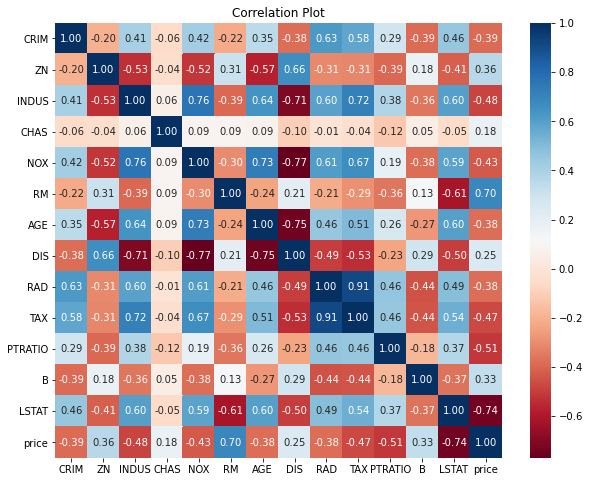

In [3]:
corr = bostonDF.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap = 'RdBu', annot = True, fmt = '.2f')
plt.title('Correlation Plot')
plt.show()

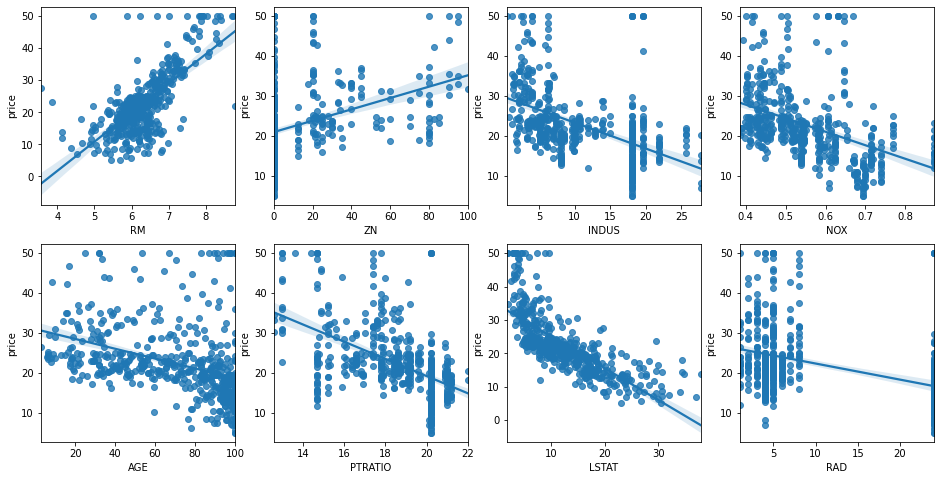

In [4]:
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y = 'price', data = bostonDF, ax = axs[row][col])

두 변수의 상호 관계만을 알아보고자 할 땐, 상관분석을 실시한다. 하지만 인과 관계를 파악하고자 할 때(한 변수가 다른 변수에 주는 영향력을 보고 싶을 때)는 회귀분석을 실시한다.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['price']
X_data = bostonDF.drop('price', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test ,y_preds)
rmse = np.sqrt(mse)

print('MSE : {0: .3f}, RMSE : {1: .3f}'.format(mse, rmse))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_preds)) )

MSE :  17.297, RMSE :  4.159
Variance score :  0.757


In [6]:
print('절편 값: ', lr.intercept_)
print('회귀 계수값 :', np.round(lr.coef_ ,1))

절편 값:  40.995595172164336
회귀 계수값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [7]:
coeff =pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [8]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores ,2))
print('5 folds의 평균 RMSE : {0: .3f}'.format(avg_rmse))

5 folds의 개별 negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE :  5.829


## Polynomial Regression과 Underfitting, Overfitting

사이킷런은 다항회귀를 지원하지 않음. PolynomialFeatures 클래스를 통해 기존 데이터를 다항식으로 변경한 후, LinearRegression을 적용해야함.

In [9]:
from sklearn.preprocessing import PolynomialFeatures

# [[0,1], [2,3]]의 matrix 생성
X = np.arange(4).reshape(2,2)
print('변경 전: \n', X)

# PolynomialFeatures 클래스를 이용해 2차 다항식으로 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('\n변경 후: \n',poly_ftr)

변경 전: 
 [[0 1]
 [2 3]]

변경 후: 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [10]:
# 3차 다항식을 구하는 함수 생성 예시

def polynomial_func(X):
    y = 1 + 2 * X[:,0] + 3 * X[:,0] ** 2 + 4 * X[:,1] ** 3
    return y

X = np.arange(0,4).reshape(2,2)
print('1차 단항식: \n ', X)
y = polynomial_func(X)
print('3차 다항식: \n', y)

# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후, 회귀계수 check
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 shape: ', model.coef_.shape)

1차 단항식: 
  [[0 1]
 [2 3]]
3차 다항식: 
 [  5 125]
3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape:  (10,)


## Pipeline

Q: Pipeline을 왜 사용하나요?

A: 머신러닝에선 데이터를 모델에 알맞게 해주는 다양한 feature engineering 방법이 있다. 이때 이런 처리를 학습 할 때 한 번, 예측하고자 하는 데이터에 한 번하여 총 2번을 해준다. 2번이라 적어보이지만 상당히 번거로울 수 있다. 위 과정을 하나의 워크 플로우로 처리해주는 것이 pipeline이다.

In [11]:
from sklearn.pipeline import Pipeline

# 위에서 만든 함수
def polynomial_func(X):
    y = 1 + 2 * X[:,0] + 3 * X[:,0] ** 2 + 4 * X[:,1] ** 3
    return y

model = Pipeline([('poly', PolynomialFeatures(degree = 3)),
                                 ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)
print('Polynomial 회귀 계수', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [12]:
p_model = Pipeline([('poly', PolynomialFeatures(degree = 2, include_bias = False)),
                                     ('linear', LinearRegression())])
p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test ,y_preds)
rmse = np.sqrt(mse)

print('MSE : {0: .3f}, RMSE : {1: .3f}'.format(mse, rmse))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_preds)) )

MSE :  15.556, RMSE :  3.944
Variance score :  0.782


- 기존 linear : MSE :  17.297 / RMSE / 4.159 / r2 score :  0.757
- Polynomial : MSE :  15.556 / RMSE :  3.944 / r2 score :  0.782

In [13]:
X_train_poly = PolynomialFeatures(degree = 2, include_bias=False).fit_transform(X_train, y_train)
print('Polynomial 전: ', X_train.shape)
print('Polynomial 후: ', X_train_poly.shape)

Polynomial 전:  (354, 13)
Polynomial 후:  (354, 104)


총 91개의 feature가 생성되었다. degree 값이 높아질수록 아래의 그래프처럼 overfitting 될 수 있으므로 주의해야한다.

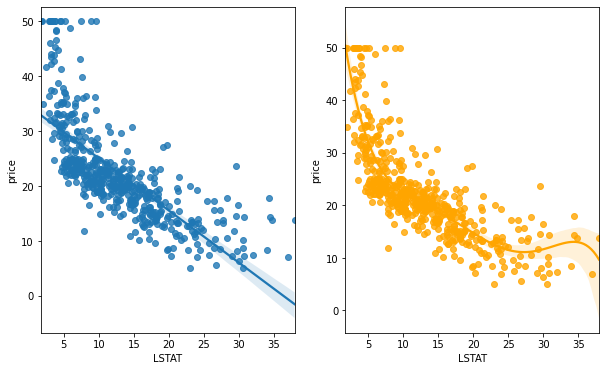

In [14]:
fig, (ax1,ax2) = plt.subplots(figsize = (10,6), ncols = 2, nrows = 1)
sns.regplot(x = 'LSTAT', y = 'price', data = bostonDF, ax = ax1)
sns.regplot(x = 'LSTAT', y = 'price', data = bostonDF, order = 5, ax = ax2, color = 'orange')
plt.show()

## 규제 선형회귀 (Regularized Linear Regression)

Cost Function의 목표는 RSS를 최소화하는 것이다. 그런데 RSS를 낮추기 위해 다항식이 복잡해지자, 회귀 계수가 매우 크게 설정되며 오버피팅 되었다. alpha(하이퍼 파라미터) * W^2(회귀계수의 제곱값)을 더해줌으로써 이를 방지한다. 

결과적으로 Cost Function의 목표는 RSS를 최소화하는 것과 동시에 회귀계수의 크기를 제어하는 것이다.

### Ridge

L2 규제를 적용한 회귀

In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10) # default = 1
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores ,2))
print('5 folds의 평균 RMSE : {0: .3f}'.format(avg_rmse))

5 folds의 개별 negative MSE scores:  [-11.42 -24.29 -28.14 -74.6  -28.52]
5 folds의 개별 RMSE scores:  [3.38 4.93 5.31 8.64 5.34]
5 folds의 평균 RMSE :  5.518


In [17]:
# alpha를 조정해가면서 RMSE 추정

alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    
    print('alpha {0}일 때, 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때, 5 folds의 평균 RMSE: 5.829
alpha 0.1일 때, 5 folds의 평균 RMSE: 5.788
alpha 1일 때, 5 folds의 평균 RMSE: 5.653
alpha 10일 때, 5 folds의 평균 RMSE: 5.518
alpha 100일 때, 5 folds의 평균 RMSE: 5.330


alpha가 증가할수록 RMSE가 감소하였음.

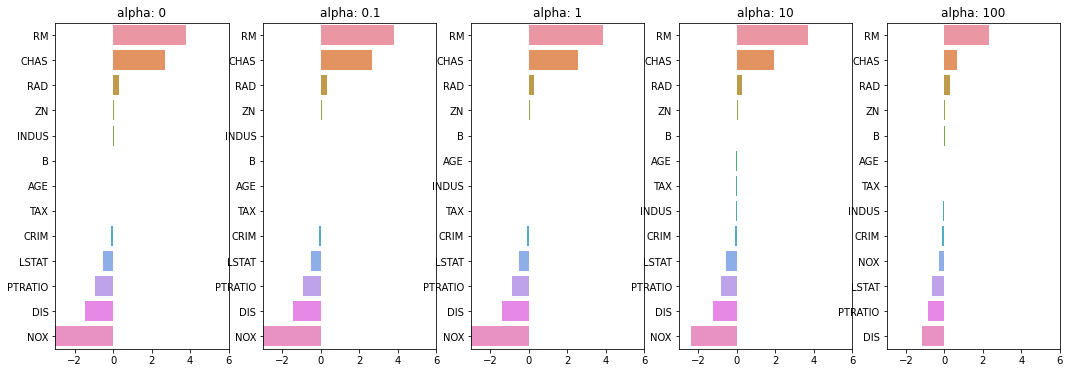

In [19]:
# subplot을 위한 fig, axs 설정
fig, axs = plt.subplots(figsize = (18,6), nrows =1, ncols =5)

coeff_df = pd.DataFrame()

# for문을 통해 alpha 반복
for pos, alpha in enumerate(alphas):
    # Ridge 학습
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    # 회귀계수를 구함
    coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
    # 칼럼 설정
    colname = 'alpha: ' + str(alpha)
    # 칼럼별 할당
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])
    
plt.show()

linear regression에서 NOX의 회귀계수는 -19.8이 나왔었다. 

alpha 값이 점점 커지면서 회귀계수의 값을 커지는 것을 방지하였다. 

밑의 데이터프레임을 통해 자세한 값을 확인해보자

In [23]:
ridge_alphas = [0, 0.1, 1, 10, 100]

sort_column = 'alpha: ' + str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha: 0,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


alpha : 10일 때부터, NOX 변수의 회귀계수가 많이 작아진 것을 확인할 수 있다.

### Lasso
L1 규제를 적용한 회귀

Ridge 회귀(L2 규제)가 회귀 계수의 크기를 감소시키는데 포커스를 두었다면, Lasso 회귀(L1 규제)는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거한다. 따라서 L1 규제는 적절한 feature만 회귀에 포함시키는 feature selection의 특성을 가지고 있다.

In [28]:
from sklearn.linear_model import Lasso, ElasticNet

# 위에서 했던 것처럼 학습, 평가, 회귀계수를 출력하는 함수를 생성
def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose = True):
    # 회귀계수를 담을 df 생성
    coeff_df = pd.DataFrame()
    if verbose : print('------', model_name, '------')
    for param in params:
        # 모델 이름에 따라 회귀모델 생성 및 평가
        if model_name == 'Ridge' : model = Ridge(alpha = param)
        elif model_name == 'Lasso' : model = Lasso(alpha = param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha = param, l1_ratio = 0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = 'neg_mean_squared_error', cv = 5)
        avg_rmse =  np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때, 5 폴드 세트의 평균 RMSE: {1: 3f}'.format(param, avg_rmse))
        
        # cross val score는 평가만 반환하므로 재학습하여 회귀 계수를 추출한다.
        model.fit(X_data, y_target)
        coeff = pd.Series(data = model.coef_, index= X_data.columns)
        colname = 'alpha: ' + str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [29]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)

------ Lasso ------
alpha 0.07일 때, 5 폴드 세트의 평균 RMSE:  5.612284
alpha 0.1일 때, 5 폴드 세트의 평균 RMSE:  5.615116
alpha 0.5일 때, 5 폴드 세트의 평균 RMSE:  5.669123
alpha 1일 때, 5 폴드 세트의 평균 RMSE:  5.776021
alpha 3일 때, 5 폴드 세트의 평균 RMSE:  6.188763


alpha 0.07일 때, 가장 좋은 성능을 보인다.

In [30]:
sort_column = 'alpha: ' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by = sort_column, ascending = False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


위에서 언급하였듯, Lasso 회귀는 불필요한 회귀계수를 급격히 감소시킨다. 때문에 회귀계수가 0으로 된 column들이 조금씩 보인다.

### ElasticNet
Ridge와 Lasso를 절충한 모델.

주요 파라미터는 alpha와 L1 ratio가 있다. 여기서 alpha는 L1 규제(Lasso)의 alpha 값과 L2 규제(Ridge)의 alpha 값의 합을 의미한다. 

L1 ratio는 a / (a+b)이다.  L1 ratio가 0이면 a = 0이므로 L2 규제와 동일하고, 1이면 b = 0이므로 L1 규제와 동일하다.

ex) L1 ratio = 0.7이라면 a/a+b = 7/10. -> a(L1 alpha) = 7 , b(L2 alpha) = 3이라는 말이다.

In [32]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas, X_data_n = X_data, y_target_n=  y_target)

------ ElasticNet ------
alpha 0.07일 때, 5 폴드 세트의 평균 RMSE:  5.541654
alpha 0.1일 때, 5 폴드 세트의 평균 RMSE:  5.525928
alpha 0.5일 때, 5 폴드 세트의 평균 RMSE:  5.466749
alpha 1일 때, 5 폴드 세트의 평균 RMSE:  5.596874
alpha 3일 때, 5 폴드 세트의 평균 RMSE:  6.068122


alpha 0.5일 때, 성능이 가장 좋다.

In [33]:
sort_column = 'alpha: ' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by = sort_column, ascending = False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


Lasso보다는 회귀계수가 0으로 되는 비율이 조금 줄었다.

## 선형 회귀 모델을 위한 데이터 변환

회귀분석의 기본적인 4가지 가정

- 선형성
-  독립성
- 등분산성
- 정규성

회귀 모델과 같은 선형 모델은 feature와 target 간의 선형적 관계가 있고,  feature와 target의 분포가 정규 분포 모형을 띈다고  가정(정규성)한 후, 결과를 도출한다. 따라서 feature와 target의 분포를 정규분포 모형과 근사하게 해주는 변환 작업이 필요하다. 결론적으로는 log 변환이 자주 사용된다.

## Reference :
- 회귀분석 : https://ko.wikipedia.org/wiki/%ED%9A%8C%EA%B7%80_%EB%B6%84%EC%84%9D
- underfitting vs overfitting : https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html